In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('Hitters.csv')
data.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [7]:
#Clean NA
df=data.dropna()

In [20]:
#set X as numeric predictors,y as Salary
X = df.drop(['Unnamed: 0','Salary','League','Division','NewLeague'],axis=1)
y = df['Salary']

(0.042389610765818556,
 4553993.684460036,
 -2.8179478462036798,
 8.87887358026573)

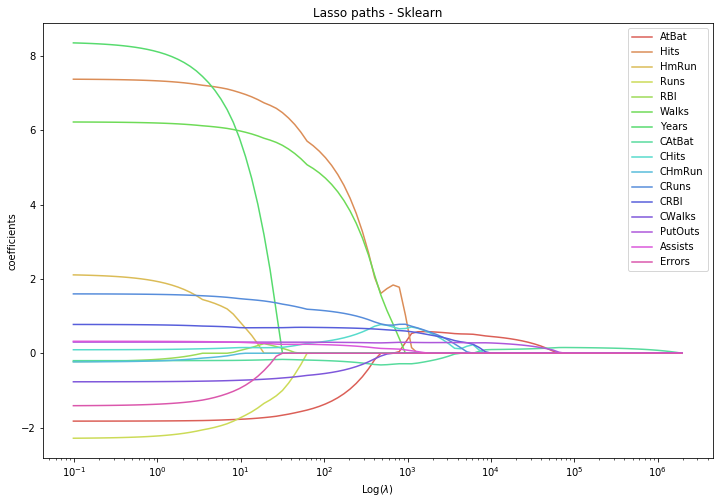

In [47]:
#1.1 Lasso

import seaborn as sns
sns.set_palette(sns.color_palette("hls", 17))
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import linear_model
from sklearn import datasets

X / np.linalg.norm(X,axis=0)
m,n = X.shape

eps = 5e-8 

alphas_lasso, coefs_lasso, _ = linear_model.lasso_path(X, y, eps, fit_intercept=False)

# Display results
plt.figure(figsize = (12,8))

for i in range(n):
    plt.plot(alphas_lasso, coefs_lasso[i],label = X.columns[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title('Lasso paths - Sklearn')
plt.legend()
plt.axis('tight')

Three predictors remain in the model: 

AtBat, CAtBat, PutOuts 

In [41]:
from sklearn.linear_model import LassoCV

lassoCV_object = LassoCV(alphas=(1e-8, 1e-4, 1e-2, 1.0, 10.0,100,1000,10000), cv=10)
lassoCV_object.fit(X, y)
print("Best model searched:\nalpha = {}\nintercept = {}\nbetas = {}, ".format(lassoCV_object.alpha_,
                                                                            lassoCV_object.intercept_,
                                                                            lassoCV_object.coef_
                                                                            )
     )

Best model searched:
alpha = 100.0
intercept = 93.32702904379346
betas = [-1.73102746  5.87422932  0.         -0.          0.          4.76607398
 -0.         -0.22686856  0.33793296  0.          1.28494767  0.74558358
 -0.59798747  0.29038641  0.26546646 -0.        ], 


Optimal value of the regularization penalty is aplha = 100, there are 10 variable in that model.

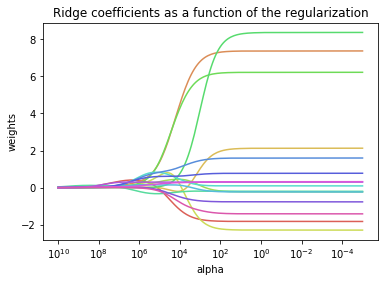

In [57]:
#1.2 Ridge

n_alphas = 200
alphas = np.logspace(-5, 10, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [60]:
from sklearn.linear_model import RidgeCV

ridgeCV_object = RidgeCV(alphas=(1e-8, 1e-4, 1e-2, 1.0, 1e2,1e4,1e5,1e6,1e7,1e8,1e9,1e10), cv=10)
ridgeCV_object.fit(X, y)
print("Best model searched:\nalpha = {}\nintercept = {}\nbetas = {}, ".format(ridgeCV_object.alpha_,
                                                                            ridgeCV_object.intercept_,
                                                                            ridgeCV_object.coef_
                                                                            )
     )

Best model searched:
alpha = 1000000.0
intercept = 22.572545465198118
betas = [ 0.35128556  0.33008884  0.02278889  0.19361154  0.13124498  0.2364573
 -0.00788683 -0.21824117  0.59467818  0.15590102  0.52775389  0.47315098
  0.01836236  0.29321514  0.09776173 -0.0232854 ], 


Optimal value of the regularization penalty is aplha = 1000000, there are 16 variable in that model.

**2 Short Answer**

Bias-Variance Tradeoff means that for each model we build, as we decrease the bias of the model, the variance will increase. Same as we decrease the variance of the model, the bias will increase. Regularization is a way to help us select point for balancing the tradeoff: select a midpoint between the first scenario of high bias and the later scenario of high variance. In Lasso and Ridge case, regularization help us decide which alpha we should use to use between the tradeoff.